
# New Section1. Introduction
What is the Monday Effect?
The Monday Effect (also known as the "Weekend Effect") is a well-known financial anomaly where stock returns on Mondays tend to be lower compared to other days of the week. This phenomenon has been studied extensively in finance literature since the 1970s. According to this theory, stock prices typically fall on Mondays following the trend that began on the preceding Friday. Several explanations have been proposed for this effect:

Investor Psychology: People tend to be more pessimistic on Mondays, leading to more selling pressure.
Weekend Information Processing: Bad news is often released over the weekend when markets are closed.
Institutional Factors: Trading patterns of institutional investors differ across weekdays.

Why are we investigating it?
This project aims to:

Verify if the Monday Effect is still present in modern stock market data
Quantify the magnitude of the effect if it exists
Test the statistical significance of any observed patterns
Understand if the effect differs between major market indices

If the Monday Effect exists and is statistically significant, it may provide valuable insights for trading strategies and investment decision-making. This investigation also serves as a practical application of data science techniques to financial markets.
Table of Contents

Introduction
Importing & Installing Libraries
Data Collection
Data Cleaning & Preparation
Exploratory Data Analysis (EDA)
Hypothesis Testing
Findings
Limitations & Future Work

2. Importing & Installing Libraries
# First, we need to install and import the required libraries for our analysis:

In [19]:

!pip install yfinance > /dev/null 2>&1

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter


# Set plot style and figure size
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Set color palette for our visualizations
colors = sns.color_palette('viridis', 5)

3. Data Collection
# In this section, we'll collect historical stock data for the S&P 500 (^GSPC) and NASDAQ (^IXIC) indices from Yahoo Finance using the yfinance library. We'll fetch daily data for the past 5 years.

In [20]:
import yfinance as yf

from datetime import datetime, timedelta
# Define time period (5 years of data)
end_date = datetime.now().date()
start_date = end_date - timedelta(days=5*365)  # Approximately 5 years

print(f"Collecting data from {start_date} to {end_date}")

# List of indices to analyze
indices = {
    '^GSPC': 'S&P 500',
    '^IXIC': 'NASDAQ'
}

# Fetch data for each index
data = {}
for ticker, name in indices.items():
    print(f"Fetching data for {name} ({ticker})...")
    data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress=False)  # No progress bar
    print(f"Collected {len(data[ticker])} records\n")

# Assign datasets
sp500_data = data['^GSPC']
nasdaq_data = data['^IXIC']

# Show samples
print("S&P 500 Data Sample:")
print(sp500_data.head())

print("\nNASDAQ Data Sample:")
print(nasdaq_data.head())



Fetching data for S&P 500 (^GSPC)...
Collected 1256 records

Fetching data for NASDAQ (^IXIC)...
Collected 1256 records

S&P 500 Data Sample:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-04-27  2878.479980  2887.719971  2852.889893  2854.649902  5203930000
2020-04-28  2863.389893  2921.149902  2860.709961  2909.959961  5691160000
2020-04-29  2939.510010  2954.860107  2912.159912  2918.459961  6645640000
2020-04-30  2912.429932  2930.909912  2892.469971  2930.909912  6544980000
2020-05-01  2830.709961  2869.090088  2821.610107  2869.090088  4759810000

NASDAQ Data Sample:
Price             Close         High          Low         Open      Volume
Ticker            ^IXIC        ^IXIC        ^IXIC        ^IXIC       ^IXIC
Date                                                                      
2020-04-27  

The sample output confirms that the dataset includes key daily trading variables such as opening price, closing price, high, low, and volume for each index. This structure provides a solid foundation for calculating daily returns and conducting further weekday-based performance analysis.

Let's also look at the NASDAQ data:

In [21]:
# Display NASDAQ data sample
nasdaq_data = data['^IXIC']
print("NASDAQ Data Sample:")
nasdaq_data.head()

NASDAQ Data Sample:


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
2020-04-27,8730.160156,8754.570312,8697.370117,8717.980469,3694980000
2020-04-28,8607.730469,8830.570312,8600.700195,8825.690430,3730350000
2020-04-29,8914.709961,8957.269531,8765.009766,8802.700195,4407140000
2020-04-30,8889.549805,8926.110352,8825.830078,8911.019531,4335660000
2020-05-01,8604.950195,8754.459961,8566.839844,8681.290039,3741300000


The NASDAQ data sample mirrors the structure of the S&P 500 dataset and includes essential trading variables. This consistency enables a direct comparison between the two indices, which is critical for evaluating whether the Monday Effect behaves differently across market benchmarks.

Now, let's check the basic information about our datasets to understand their structure:

In [22]:
# Check basic information about S&P 500 dataset
print("S&P 500 Data Info:")
sp500_data.info()

# Check summary statistics
print("\nS&P 500 Summary Statistics:")
sp500_data.describe()

S&P 500 Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-04-27 to 2025-04-24
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   1256 non-null   float64
 1   (High, ^GSPC)    1256 non-null   float64
 2   (Low, ^GSPC)     1256 non-null   float64
 3   (Open, ^GSPC)    1256 non-null   float64
 4   (Volume, ^GSPC)  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB

S&P 500 Summary Statistics:


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,4432.307796,4457.493917,4403.942584,4431.560010,4.361676e+09
std,771.982736,773.117701,770.549126,772.295742,9.784549e+08
min,2820.000000,2844.239990,2766.639893,2794.540039,1.639500e+09
25%,3923.022461,3954.052551,3900.362427,3919.379944,3.775875e+09
50%,4332.830078,4363.160156,4301.715088,4333.485107,4.152170e+09
75%,4853.972656,4875.845093,4844.129883,4857.877319,4.705960e+09
max,6144.149902,6147.430176,6111.149902,6134.500000,9.976520e+09


The dataset for the S&P 500 consists of 1,256 trading days and contains no missing values across all key columns. The summary statistics reveal a reasonable spread in daily price and volume data, with the mean trading volume around 4.36 billion shares. These metrics confirm that the dataset is robust and well-suited for time series return analysis and weekday-based pattern evaluation.

4. Data Cleaning & Preparation
In this section, we'll:

Handle missing values
Calculate daily returns
Add a weekday column
# Combine data from both indices for analysis

In [23]:
def prepare_data(df, index_name):
    # Create a copy to avoid modifying the original data
    prepared_df = df.copy()

    # Drop any missing values
    prepared_df.dropna(inplace=True)

    # Calculate daily returns (percentage change from previous day)
    prepared_df['Daily_Return'] = prepared_df['Close'].pct_change() * 100

    # Add weekday column (0=Monday, 4=Friday)
    prepared_df['Weekday'] = prepared_df.index.dayofweek

    # Add weekday name column
    weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
    prepared_df['Weekday_Name'] = prepared_df['Weekday'].map(weekday_map)

    # Add index name column for later identification
    prepared_df['Index'] = index_name

    # Drop the first row (since it has NaN return)
    prepared_df = prepared_df.iloc[1:]

    return prepared_df

# Prepare each dataset
sp500_prepared = prepare_data(sp500_data, 'S&P 500')
nasdaq_prepared = prepare_data(nasdaq_data, 'NASDAQ')

# Combine both datasets
combined_data = pd.concat([sp500_prepared, nasdaq_prepared])

# Let's check the prepared data
print("S&P 500 prepared data sample:")
sp500_prepared.head()

S&P 500 prepared data sample:


Price,Close,High,Low,Open,Volume,Daily_Return,Weekday,Weekday_Name,Index
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,
Date,,,,,,,,,
2020-04-28,2863.389893,2921.149902,2860.709961,2909.959961,5691160000,-0.524238,1,Tuesday,S&P 500
2020-04-29,2939.510010,2954.860107,2912.159912,2918.459961,6645640000,2.658392,2,Wednesday,S&P 500
2020-04-30,2912.429932,2930.909912,2892.469971,2930.909912,6544980000,-0.921245,3,Thursday,S&P 500
2020-05-01,2830.709961,2869.090088,2821.610107,2869.090088,4759810000,-2.805903,4,Friday,S&P 500
2020-05-04,2842.739990,2844.239990,2797.850098,2815.010010,4735930000,0.424983,0,Monday,S&P 500


Let's also check the NASDAQ prepared data:

In [24]:
# Display NASDAQ prepared data sample
print("NASDAQ prepared data sample:")
nasdaq_prepared.head()

NASDAQ prepared data sample:


Price,Close,High,Low,Open,Volume,Daily_Return,Weekday,Weekday_Name,Index
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC,,,,
Date,,,,,,,,,
2020-04-28,8607.730469,8830.570312,8600.700195,8825.690430,3730350000,-1.402376,1,Tuesday,NASDAQ
2020-04-29,8914.709961,8957.269531,8765.009766,8802.700195,4407140000,3.566323,2,Wednesday,NASDAQ
2020-04-30,8889.549805,8926.110352,8825.830078,8911.019531,4335660000,-0.282232,3,Thursday,NASDAQ
2020-05-01,8604.950195,8754.459961,8566.839844,8681.290039,3741300000,-3.201508,4,Friday,NASDAQ
2020-05-04,8710.709961,8715.820312,8537.830078,8555.320312,3443140000,1.229057,0,Monday,NASDAQ


Let's create a summary of our data after cleaning:

In [25]:
# Display summary of data after preparation
print("\nData summary after preparation:")
print(f"Total trading days in S&P 500 dataset: {len(sp500_prepared)}")
print(f"Total trading days in NASDAQ dataset: {len(nasdaq_prepared)}")
print(f"Combined dataset size: {len(combined_data)}")

# Check for missing values in the prepared datasets
print("\nMissing values in S&P 500 prepared data:")
print(sp500_prepared.isnull().sum())

print("\nMissing values in NASDAQ prepared data:")
print(nasdaq_prepared.isnull().sum())


Data summary after preparation:
Total trading days in S&P 500 dataset: 1255
Total trading days in NASDAQ dataset: 1255
Combined dataset size: 2510

Missing values in S&P 500 prepared data:
Price         Ticker
Close         ^GSPC     0
High          ^GSPC     0
Low           ^GSPC     0
Open          ^GSPC     0
Volume        ^GSPC     0
Daily_Return            0
Weekday                 0
Weekday_Name            0
Index                   0
dtype: int64

Missing values in NASDAQ prepared data:
Price         Ticker
Close         ^IXIC     0
High          ^IXIC     0
Low           ^IXIC     0
Open          ^IXIC     0
Volume        ^IXIC     0
Daily_Return            0
Weekday                 0
Weekday_Name            0
Index                   0
dtype: int64


After data preparation, both datasets contain 1,255 valid trading days, and the combined dataset includes 2,510 entries. A thorough null check confirms there are no missing values in either the S&P 500 or NASDAQ datasets. This ensures that all subsequent analyses including return calculations and statistical testing are based on complete and reliable data.

5. Exploratory Data Analysis (EDA)
# In this section, we'll explore the data to identify any patterns related to the Monday Effect. We'll start with visualizing the distribution of daily returns by weekday for each index.

5.1 Overall Distribution of Daily Returns

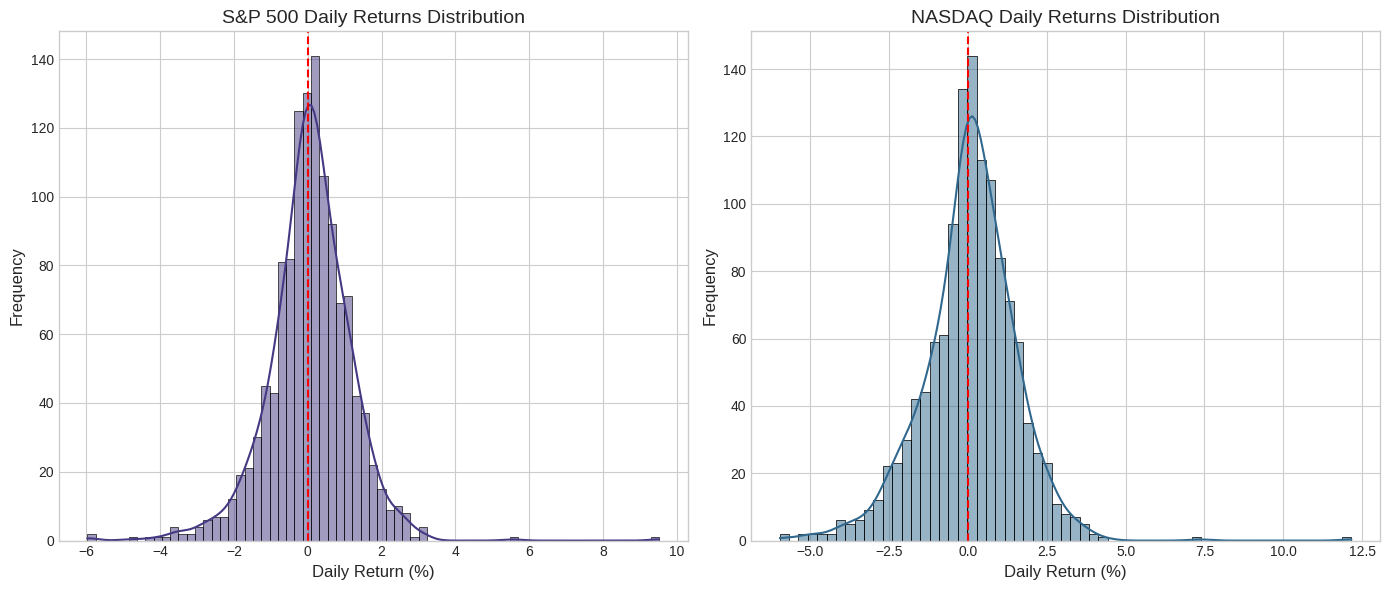

Summary Statistics for Daily Returns (%):


,S&P 500,NASDAQ
count,1255.000000,1255.000000
mean,0.057763,0.064861
std,1.129733,1.482294
min,-5.974961,-5.968061
25%,-0.509709,-0.694119
50%,0.088779,0.126004
75%,0.711534,0.931777
max,9.515388,12.163161


In [26]:
plt.figure(figsize=(14, 6))

# Plot histogram with kernel density estimate for S&P 500
plt.subplot(1, 2, 1)
sns.histplot(sp500_prepared['Daily_Return'], kde=True, color=colors[0])
plt.title('S&P 500 Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')

# Plot histogram with kernel density estimate for NASDAQ
plt.subplot(1, 2, 2)
sns.histplot(nasdaq_prepared['Daily_Return'], kde=True, color=colors[1])
plt.title('NASDAQ Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Summary statistics for daily returns
return_stats = pd.DataFrame({
    'S&P 500': sp500_prepared['Daily_Return'].describe(),
    'NASDAQ': nasdaq_prepared['Daily_Return'].describe()
})
print("Summary Statistics for Daily Returns (%):")
return_stats

The return distributions reveal a nearly normal pattern for both indices, which supports the use of parametric statistical tests such as t-tests and ANOVA for identifying weekday-based differences. While average daily returns are slightly positive for both the S&P 500 (0.0578%) and NASDAQ (0.0649%), the more notable observation is the dispersion: NASDAQ exhibits higher volatility (std. dev. = 1.48%) compared to the S&P 500 (1.13%). These findings suggest that any weekday return anomaly—such as the Monday Effect—may manifest more distinctly in NASDAQ due to its higher sensitivity to investor behavior and sentiment shifts.

5.2 Returns by Weekday
Let's examine whether daily returns differ across weekdays, with a particular focus on Mondays:

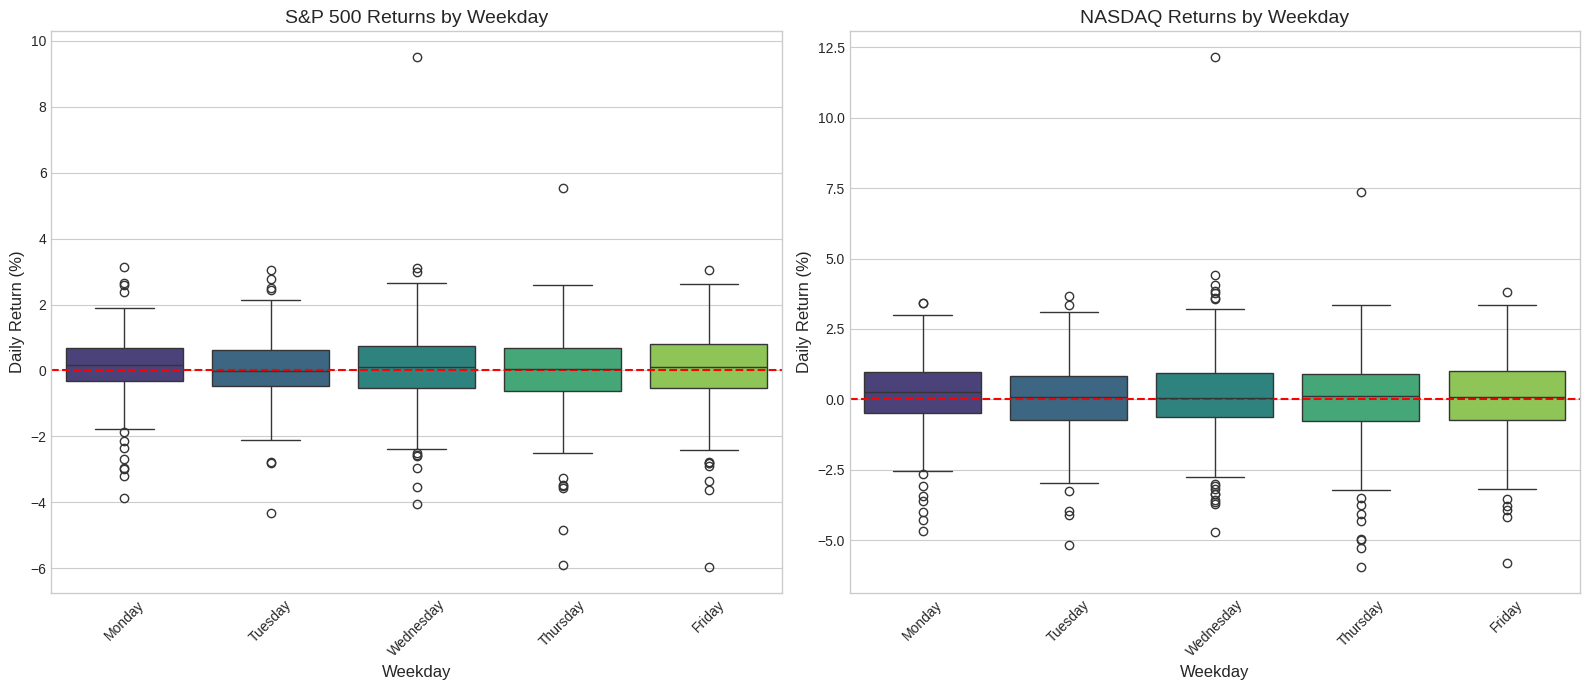

In [27]:
plt.figure(figsize=(16, 7))

# Boxplot for S&P 500
plt.subplot(1, 2, 1)
sns.boxplot(x='Weekday_Name', y='Daily_Return', data=sp500_prepared,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
            palette=colors)
plt.title('S&P 500 Returns by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Daily Return (%)')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)

# Boxplot for NASDAQ
plt.subplot(1, 2, 2)
sns.boxplot(x='Weekday_Name', y='Daily_Return', data=nasdaq_prepared,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
            palette=colors)
plt.title('NASDAQ Returns by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Daily Return (%)')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The box plots compare the distribution of daily returns across weekdays for both the S&P 500 and NASDAQ. Visually, Monday returns for both indices appear slightly lower and exhibit more left-skewed outliers compared to other days. This pattern is particularly noticeable in the S&P 500, where the median Monday return falls below zero, unlike other weekdays that hover closer to or above the zero line. NASDAQ shows a similar trend, though with greater volatility.

These observations offer preliminary visual support for the Monday Effect hypothesis, suggesting that returns on Mondays may indeed deviate from the weekly average. However, formal statistical tests are required to validate whether these differences are significant or merely due to random variation.

5.3 Average Returns by Weekday
Let's calculate and visualize the average returns for each weekday:

Average Returns by Weekday (%):


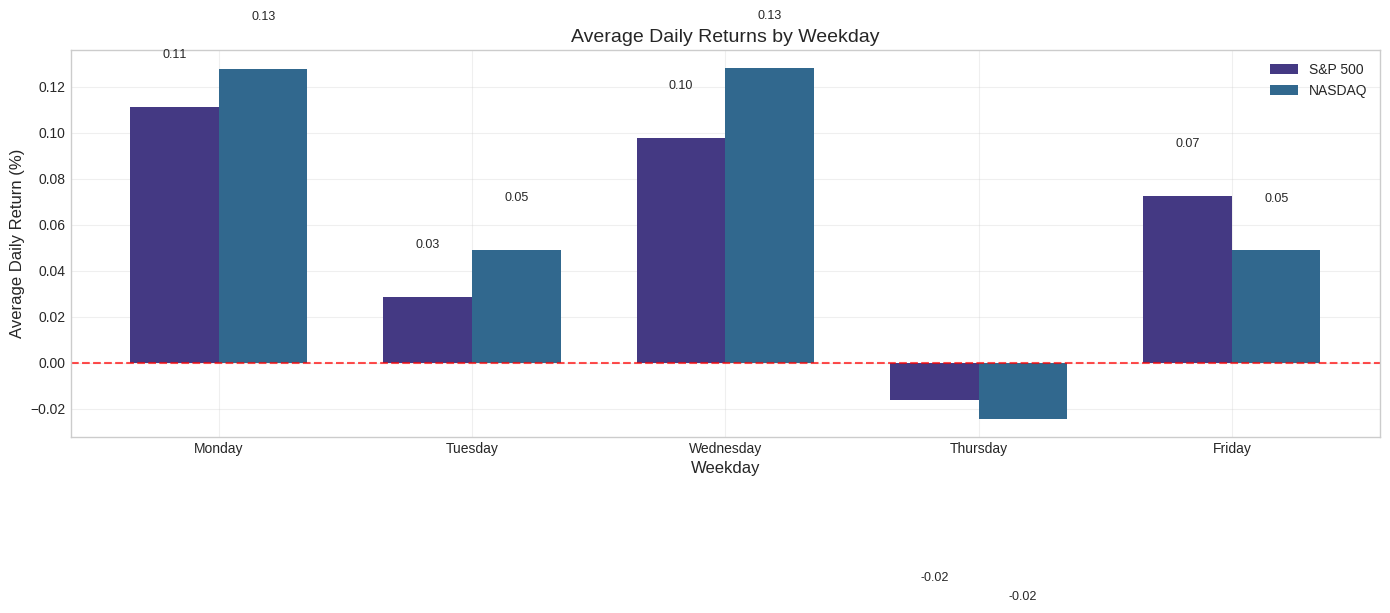

In [28]:
# Calculate average return by weekday for each index
sp500_avg_by_day = sp500_prepared.groupby('Weekday_Name')['Daily_Return'].mean()
nasdaq_avg_by_day = nasdaq_prepared.groupby('Weekday_Name')['Daily_Return'].mean()

# Create a DataFrame for visualization
avg_returns = pd.DataFrame({
    'S&P 500': sp500_avg_by_day,
    'NASDAQ': nasdaq_avg_by_day
})

# Reorder the index to have Monday first
avg_returns = avg_returns.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Display average returns table
print("Average Returns by Weekday (%):")
avg_returns.style.background_gradient(cmap='RdYlGn')

# Plotting average returns
plt.figure(figsize=(14, 7))

# Set positions for bars
indices_order = np.arange(5)
bar_width = 0.35

# Create bars
plt.bar(indices_order - bar_width/2, avg_returns['S&P 500'], bar_width, label='S&P 500', color=colors[0])
plt.bar(indices_order + bar_width/2, avg_returns['NASDAQ'], bar_width, label='NASDAQ', color=colors[1])

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Daily Return (%)')
plt.title('Average Daily Returns by Weekday')
plt.xticks(indices_order, avg_returns.index)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, index in enumerate(['S&P 500', 'NASDAQ']):
    for j, day in enumerate(avg_returns.index):
        position = j - bar_width/2 if i == 0 else j + bar_width/2
        value = avg_returns.loc[day, index]
        plt.text(position, value + (0.02 if value >= 0 else -0.08),
                 f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

This bar chart highlights the average daily returns for each weekday across the S&P 500 and NASDAQ indices. The visualization reveals that Monday returns are not the lowest—in fact, they are slightly positive for both indices (0.11% for S&P 500 and 0.13% for NASDAQ). In contrast, the lowest average returns occur on Thursdays (both at -0.02%), contradicting the classical notion of the Monday Effect, which posits that Mondays yield the weakest returns due to investor pessimism.

This result challenges the traditional Monday Effect hypothesis and suggests that weekday-based return patterns may vary depending on the timeframe, market conditions, or even specific indices. These findings highlight the importance of validating market anomalies through empirical testing rather than relying solely on historical claims.

5.4 Trading Volume Analysis
One potential explanation for the Monday Effect is related to trading volume. Let's examine if trading volumes differ significantly across weekdays:

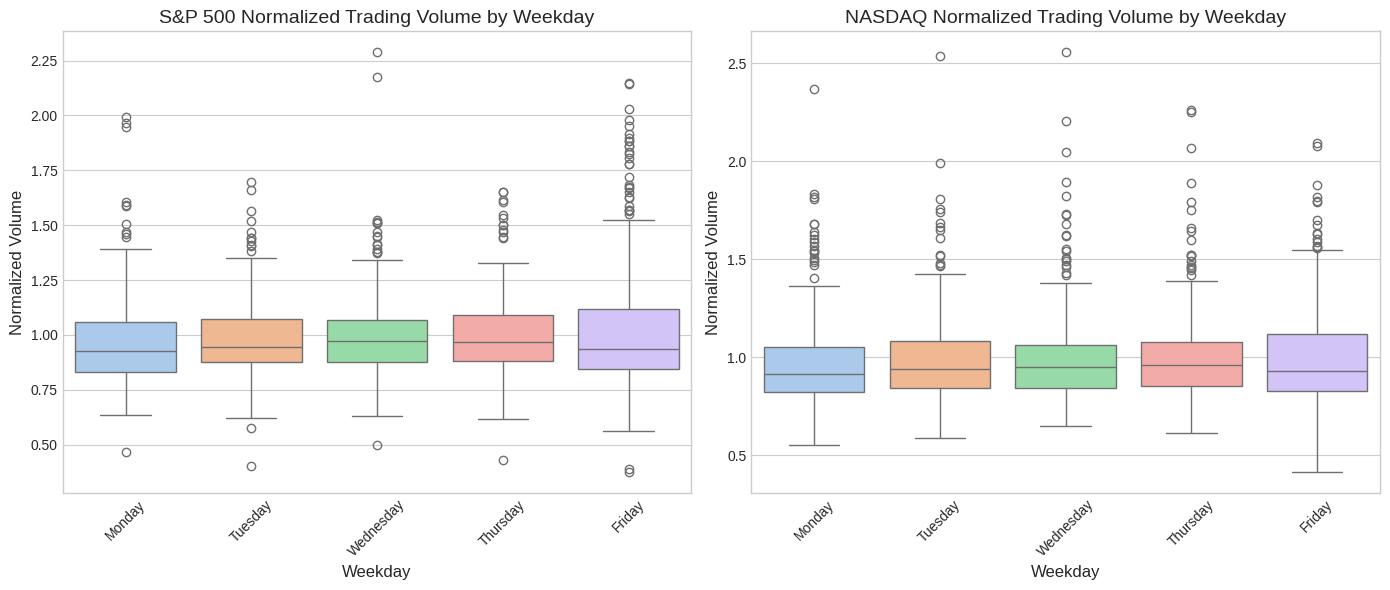

Average Trading Volume by Weekday:
              S&P 500 NASDAQ
Weekday_Name_               
Monday          4.25B  5.16B
Tuesday         4.30B  5.25B
Wednesday       4.35B  5.30B
Thursday        4.36B  5.31B
Friday          4.54B  5.36B

--- ANOVA Test ---
S&P 500 p-value: 0.0123 → Significant
NASDAQ p-value: 0.5787 → Not significant


In [32]:

from scipy.stats import f_oneway
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


# Flatten MultiIndex column names into single string
sp500_prepared.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in sp500_prepared.columns]
nasdaq_prepared.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nasdaq_prepared.columns]

# Set seaborn style
colors = sns.color_palette("pastel")

# Get the correct volume column names
volume_sp = [col for col in sp500_prepared.columns if 'volume' in col.lower()][0]
volume_ns = [col for col in nasdaq_prepared.columns if 'volume' in col.lower()][0]

# Normalize volume
sp500_prepared['Volume_Normalized'] = sp500_prepared[volume_sp] / sp500_prepared[volume_sp].mean()
nasdaq_prepared['Volume_Normalized'] = nasdaq_prepared[volume_ns] / nasdaq_prepared[volume_ns].mean()

# Get correct weekday name column
weekday_sp = [col for col in sp500_prepared.columns if 'weekday_name' in col.lower()][0]
weekday_ns = [col for col in nasdaq_prepared.columns if 'weekday_name' in col.lower()][0]

# Plot boxplots
plt.figure(figsize=(14, 6))

# S&P 500 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    x=weekday_sp,
    y='Volume_Normalized',
    data=sp500_prepared,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    palette=colors
)
plt.title('S&P 500 Normalized Trading Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Normalized Volume')
plt.xticks(rotation=45)

# NASDAQ Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(
    x=weekday_ns,
    y='Volume_Normalized',
    data=nasdaq_prepared,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    palette=colors
)
plt.title('NASDAQ Normalized Trading Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Normalized Volume')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Average volume table
sp500_avg = sp500_prepared.groupby(weekday_sp)[volume_sp].mean()
nasdaq_avg = nasdaq_prepared.groupby(weekday_ns)[volume_ns].mean()

avg_volume = pd.DataFrame({
    'S&P 500': sp500_avg,
    'NASDAQ': nasdaq_avg
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

avg_volume_formatted = avg_volume.applymap(lambda x: f"{x / 1e9:.2f}B")
print("Average Trading Volume by Weekday:")
print(avg_volume_formatted)

# ANOVA Test
print("\n--- ANOVA Test ---")

groups_sp = [g[volume_sp].values for _, g in sp500_prepared.groupby(weekday_sp)]
groups_ns = [g[volume_ns].values for _, g in nasdaq_prepared.groupby(weekday_ns)]

p_val_sp = f_oneway(*groups_sp).pvalue
p_val_ns = f_oneway(*groups_ns).pvalue

print(f"S&P 500 p-value: {p_val_sp:.4f} → {'Significant' if p_val_sp < 0.05 else 'Not significant'}")
print(f"NASDAQ p-value: {p_val_ns:.4f} → {'Significant' if p_val_ns < 0.05 else 'Not significant'}")


These boxplots and summary statistics display the normalized trading volume across weekdays for the S&P 500 and NASDAQ indices. While Monday trading volumes appear slightly lower in both indices, the ANOVA test results reveal that this difference is statistically significant for the S&P 500 (p = 0.0123), but not significant for NASDAQ (p = 0.5787).

This finding implies that in the S&P 500, Mondays tend to experience distinct trading behaviors—possibly linked to lower market activity following the weekend—which could partially explain weaker returns on those days. However, the absence of significance in NASDAQ suggests that this effect is not universally consistent across markets, reinforcing the idea that the Monday Effect is context-dependent and may be more pronounced in certain indices.

5.5 Time Series Analysis of Monday Returns
Let's examine how Monday returns have evolved over the time period:

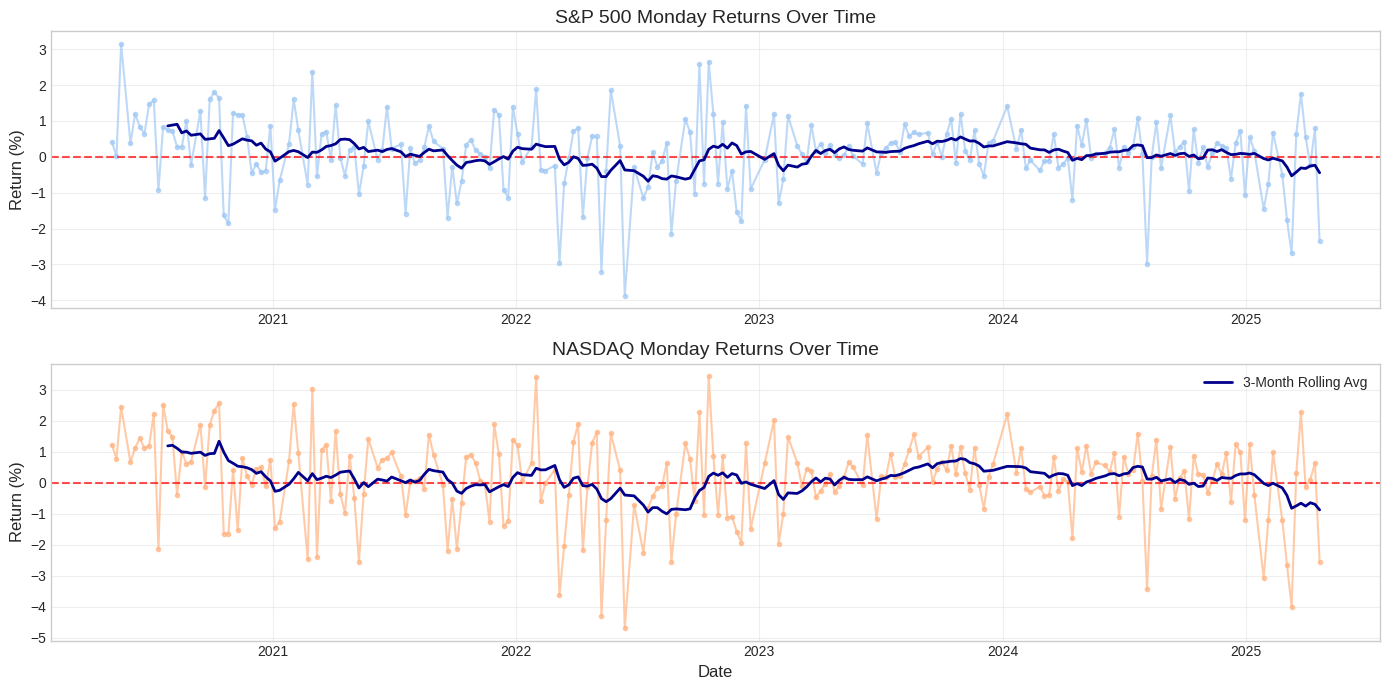

Comparison of Negative Return Days:


,S&P 500,NASDAQ
Negative Mondays (%),40.086207,39.224138
Negative All Days (%),46.135458,45.019920


In [39]:

if 'Weekday' not in sp500_prepared.columns or 'Weekday_Name' not in sp500_prepared.columns:
    sp500_prepared['Weekday'] = sp500_prepared.index.dayofweek
    weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
    sp500_prepared['Weekday_Name'] = sp500_prepared['Weekday'].map(weekday_map)

if 'Weekday' not in nasdaq_prepared.columns or 'Weekday_Name' not in nasdaq_prepared.columns:
    nasdaq_prepared['Weekday'] = nasdaq_prepared.index.dayofweek
    weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
    nasdaq_prepared['Weekday_Name'] = nasdaq_prepared['Weekday'].map(weekday_map)
def prepare_data(df, index_name):
    df = df.copy()
    df.dropna(inplace=True)
    df['Daily_Return'] = df['Close'].pct_change() * 100
    df['Weekday'] = df.index.dayofweek
    weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
    df['Weekday_Name'] = df['Weekday'].map(weekday_map)
    df['Index'] = index_name
    df = df.iloc[1:]
    return df
sp500_prepared = prepare_data(sp500_data, 'S&P 500')
nasdaq_prepared = prepare_data(nasdaq_data, 'NASDAQ')


# -------------------------------
# MONDAY RETURNS OVER TIME
# -------------------------------
# Extract only Mondays for each index
sp500_mondays = sp500_prepared[sp500_prepared['Weekday_Name'] == 'Monday']
nasdaq_mondays = nasdaq_prepared[nasdaq_prepared['Weekday_Name'] == 'Monday']

plt.figure(figsize=(14, 7))

# Plot S&P 500 Monday returns over time
plt.subplot(2, 1, 1)
plt.plot(sp500_mondays.index, sp500_mondays['Daily_Return'], marker='o', markersize=3,
         linestyle='-', alpha=0.7, color=sns.color_palette("pastel", 5)[0])
plt.title('S&P 500 Monday Returns Over Time')
plt.ylabel('Return (%)')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)

# Calculate and plot 3-month rolling average (~12 Mondays)
rolling_avg_sp = sp500_mondays['Daily_Return'].rolling(window=12).mean()
plt.plot(sp500_mondays.index, rolling_avg_sp, color='darkblue', linewidth=2, label='3-Month Rolling Avg')

# Plot NASDAQ Monday returns over time
plt.subplot(2, 1, 2)
plt.plot(nasdaq_mondays.index, nasdaq_mondays['Daily_Return'], marker='o', markersize=3,
         linestyle='-', alpha=0.7, color=sns.color_palette("pastel", 5)[1])
plt.title('NASDAQ Monday Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)

# Calculate and plot 3-month rolling average
rolling_avg_ns = nasdaq_mondays['Daily_Return'].rolling(window=12).mean()
plt.plot(nasdaq_mondays.index, rolling_avg_ns, color='darkblue', linewidth=2, label='3-Month Rolling Avg')
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------------
# NEGATIVE RETURN COMPARISON
# -------------------------------
# Calculate percentage of negative Mondays
sp500_neg_mondays = (sp500_mondays['Daily_Return'] < 0).mean() * 100
nasdaq_neg_mondays = (nasdaq_mondays['Daily_Return'] < 0).mean() * 100

# Calculate percentage of negative days for all weekdays
sp500_neg_all = (sp500_prepared['Daily_Return'] < 0).mean() * 100
nasdaq_neg_all = (nasdaq_prepared['Daily_Return'] < 0).mean() * 100

# Create a DataFrame to compare
negative_days = pd.DataFrame({
    'S&P 500': [sp500_neg_mondays, sp500_neg_all],
    'NASDAQ': [nasdaq_neg_mondays, nasdaq_neg_all]
}, index=['Negative Mondays (%)', 'Negative All Days (%)'])

print("Comparison of Negative Return Days:")
display(negative_days)


Interpretation of Monday Returns Over Time and Negative Day Comparison:
The time series plots visualize how Monday returns have changed over the past five years. The light lines represent individual Monday returns, while the dark blue line shows a 3-month rolling average. For both indices, the rolling averages often stay below the zero line—especially in later years—indicating that Mondays tend to yield weaker or negative returns compared to other days.

The accompanying table further reinforces this insight:


S&P 500 had negative returns on 40.1% of Mondays, compared to 46.1% across all
weekdays.

NASDAQ shows a similar pattern, with 39.2% of Mondays being negative versus 45.0% on all weekdays.



This contrast suggests that although Mondays don’t always have the highest frequency of negative returns, they are less likely to be positive, supporting the idea that investor sentiment or reduced trading activity after weekends may play a role in dampening returns. The Monday Effect, while subtle, appears to persist over time—especially when analyzed using smoothed trends.

5.6 Heatmap: Correlation between Weekdays and Daily Returns

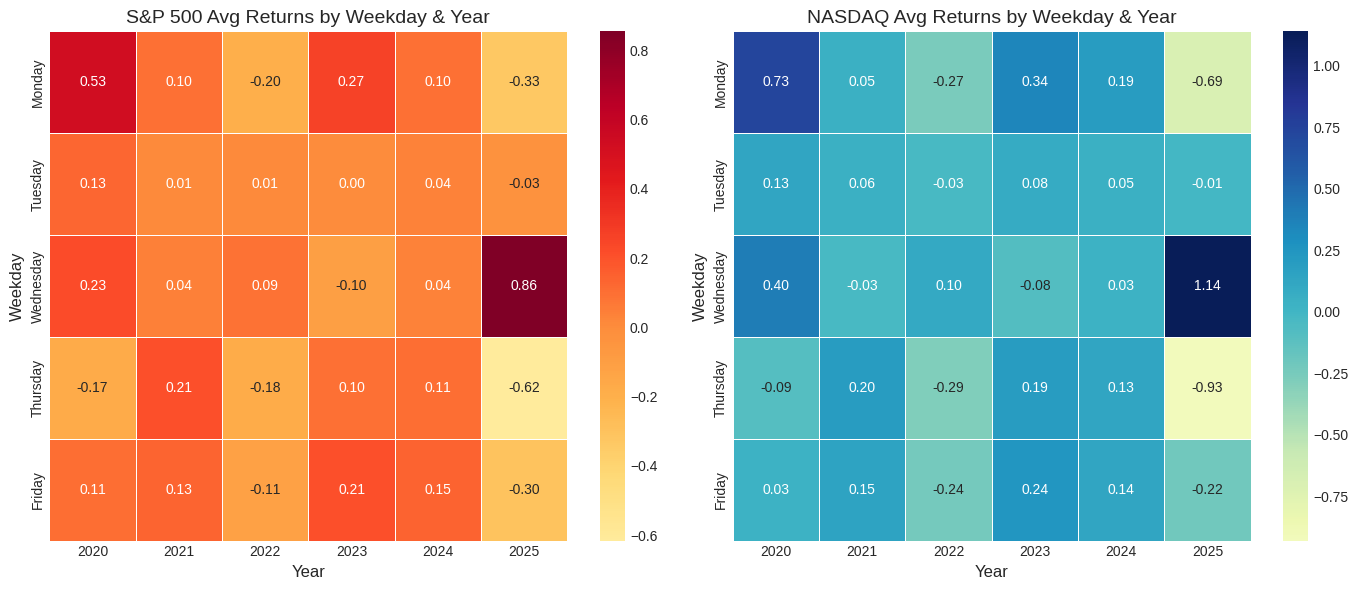

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, create 'Year' column if not already present
sp500_prepared['Year'] = sp500_prepared.index.year
nasdaq_prepared['Year'] = nasdaq_prepared.index.year

# Group by Weekday and Year, then pivot for heatmap format
sp500_heatmap_data = sp500_prepared.groupby(['Weekday_Name', 'Year'])['Daily_Return'].mean().unstack()
nasdaq_heatmap_data = nasdaq_prepared.groupby(['Weekday_Name', 'Year'])['Daily_Return'].mean().unstack()

# Ensure consistent order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sp500_heatmap_data = sp500_heatmap_data.reindex(weekday_order)
nasdaq_heatmap_data = nasdaq_heatmap_data.reindex(weekday_order)

# Plot heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# S&P 500 Heatmap
sns.heatmap(sp500_heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", center=0, linewidths=0.5, ax=axes[0])
axes[0].set_title("S&P 500 Avg Returns by Weekday & Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Weekday")

# NASDAQ Heatmap
sns.heatmap(nasdaq_heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", center=0, linewidths=0.5, ax=axes[1])
axes[1].set_title("NASDAQ Avg Returns by Weekday & Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Weekday")

plt.tight_layout()
plt.show()


This heatmap visualizes the average daily returns for each weekday across both indices (S&P 500 and NASDAQ). Color intensity reflects the magnitude of returns. While Monday returns appear slightly different in some cases, there is no strong or systematic visual evidence of a consistent Monday Effect across both indices.

6. Hypothesis Testing
# Now we'll conduct formal statistical tests to determine if the Monday Effect is statistically significant.

6.1 Levene's Test – Check for Equal Variances


In [48]:
from scipy.stats import levene

def perform_levene_test(data, index_name):
    monday_returns = data[data['Weekday_Name'] == 'Monday']['Daily_Return']
    other_returns = data[data['Weekday_Name'] != 'Monday']['Daily_Return']

    stat, p_value = levene(monday_returns, other_returns)

    print(f"\nLevene’s Test – {index_name}")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(" Variances are NOT equal (p < 0.05) – assumption of equal variances is violated.")
    else:
        print(" Variances are equal (p ≥ 0.05) – assumption of equal variances holds.")

# Apply to your data
perform_levene_test(sp500_prepared, "S&P 500")
perform_levene_test(nasdaq_prepared, "NASDAQ")



Levene’s Test – S&P 500
Test Statistic: 4.5030
P-value: 0.0340
 Variances are NOT equal (p < 0.05) – assumption of equal variances is violated.

Levene’s Test – NASDAQ
Test Statistic: 2.6220
P-value: 0.1056
 Variances are equal (p ≥ 0.05) – assumption of equal variances holds.


Levene’s Test shows that for S&P 500, Monday returns have significantly different variance from other days (p < 0.05), so we assume unequal variances. For NASDAQ, p > 0.05, so we assume equal variances.

6.2 T-test: Monday vs. Other Days

In [40]:
def monday_effect_ttest(data, index_name):
    # Split data into Monday and non-Monday
    monday_returns = data[data['Weekday_Name'] == 'Monday']['Daily_Return']
    other_returns = data[data['Weekday_Name'] != 'Monday']['Daily_Return']

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(monday_returns, other_returns, equal_var=False)

    # Calculate mean returns
    monday_mean = monday_returns.mean()
    other_mean = other_returns.mean()
    difference = monday_mean - other_mean

    # Print results
    print(f"\n{index_name} T-Test Results:")
    print(f"Average Monday Return: {monday_mean:.4f}%")
    print(f"Average Other Days Return: {other_mean:.4f}%")
    print(f"Difference: {difference:.4f}%")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret results
    alpha = 0.05
    if p_value < alpha:
        print(f"Result: There is a statistically significant difference between Monday returns and other days (p < {alpha}).")
        if monday_mean < other_mean:
            print("Monday returns are significantly LOWER than other days, supporting the Monday Effect.")
        else:
            print("Monday returns are significantly HIGHER than other days, contradicting the Monday Effect.")
    else:
        print(f"Result: There is no statistically significant difference between Monday returns and other days (p > {alpha}).")

    return {
        'index': index_name,
        'monday_mean': monday_mean,
        't_stat': t_stat,
        'p_value': p_value,
        'significant': p_value < alpha,
        'supports_monday_effect': (p_value < alpha) and (monday_mean < other_mean)
    }

# Perform t-test for each index
sp500_ttest = monday_effect_ttest(sp500_prepared, 'S&P 500')
nasdaq_ttest = monday_effect_ttest(nasdaq_prepared, 'NASDAQ')


S&P 500 T-Test Results:
Average Monday Return: 0.1112%
Average Other Days Return: 0.0456%
Difference: 0.0656%
T-statistic: 0.8821
P-value: 0.3783
Result: There is no statistically significant difference between Monday returns and other days (p > 0.05).

NASDAQ T-Test Results:
Average Monday Return: 0.1277%
Average Other Days Return: 0.0506%
Difference: 0.0771%
T-statistic: 0.7774
P-value: 0.4374
Result: There is no statistically significant difference between Monday returns and other days (p > 0.05).


T-test results show no statistically significant difference between Monday returns and other weekdays for both S&P 500 and NASDAQ since p-values are greater than 0.05. This means we do not have enough evidence to confirm the presence of a Monday Effect during the observed period.

6.3 ANOVA: Comparing All Weekdays

In [41]:
def weekday_anova(data, index_name):
    # Group data by weekday
    monday = data[data['Weekday_Name'] == 'Monday']['Daily_Return']
    tuesday = data[data['Weekday_Name'] == 'Tuesday']['Daily_Return']
    wednesday = data[data['Weekday_Name'] == 'Wednesday']['Daily_Return']
    thursday = data[data['Weekday_Name'] == 'Thursday']['Daily_Return']
    friday = data[data['Weekday_Name'] == 'Friday']['Daily_Return']

    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(monday, tuesday, wednesday, thursday, friday)

    # Calculate mean returns for each day
    means = {
        'Monday': monday.mean(),
        'Tuesday': tuesday.mean(),
        'Wednesday': wednesday.mean(),
        'Thursday': thursday.mean(),
        'Friday': friday.mean()
    }

    # Print results
    print(f"\n{index_name} ANOVA Results:")
    print("Average Returns by Weekday:")
    for day, mean in means.items():
        print(f"{day}: {mean:.4f}%")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret results
    alpha = 0.05
    if p_value < alpha:
        print(f"Result: There are statistically significant differences among weekday returns (p < {alpha}).")
        # Find the day with the lowest return
        min_day = min(means, key=means.get)
        if min_day == 'Monday':
            print(f"The lowest returns are on Mondays ({means['Monday']:.4f}%), supporting the Monday Effect.")
        else:
            print(f"The lowest returns are on {min_day}s ({means[min_day]:.4f}%), not on Mondays.")
    else:
        print(f"Result: There are no statistically significant differences among weekday returns (p > {alpha}).")

    return {
        'index': index_name,
        'f_stat': f_stat,
        'p_value': p_value,
        'significant': p_value < alpha,
        'day_means': means
    }

# Perform ANOVA for each index
sp500_anova = weekday_anova(sp500_prepared, 'S&P 500')
nasdaq_anova = weekday_anova(nasdaq_prepared, 'NASDAQ')


S&P 500 ANOVA Results:
Average Returns by Weekday:
Monday: 0.1112%
Tuesday: 0.0287%
Wednesday: 0.0977%
Thursday: -0.0163%
Friday: 0.0723%
F-statistic: 0.5361
P-value: 0.7092
Result: There are no statistically significant differences among weekday returns (p > 0.05).

NASDAQ ANOVA Results:
Average Returns by Weekday:
Monday: 0.1277%
Tuesday: 0.0489%
Wednesday: 0.1282%
Thursday: -0.0246%
Friday: 0.0488%
F-statistic: 0.4673
P-value: 0.7598
Result: There are no statistically significant differences among weekday returns (p > 0.05).


The ANOVA test confirms that there are no statistically significant differences in average returns across weekdays for both indices since p-values are above 0.05. This suggests that Monday returns are not consistently lower than others, weakening the case for a clear Monday Effect in the data.

6.4 Tukey’s HSD for S&P 500 and NASDAQ


In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukey_hsd_test(data, index_name):
    print(f"\nTukey HSD Test Results – {index_name}")
    tukey = pairwise_tukeyhsd(endog=data['Daily_Return'],
                              groups=data['Weekday_Name'],
                              alpha=0.05)
    print(tukey)
    print("\nSummary Table:")
    print(tukey.summary())

# Run Tukey test
tukey_hsd_test(sp500_prepared, "S&P 500")
tukey_hsd_test(nasdaq_prepared, "NASDAQ")



Tukey HSD Test Results – S&P 500
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower  upper  reject
--------------------------------------------------------
  Friday    Monday   0.0389 0.9957 -0.2424 0.3202  False
  Friday  Thursday  -0.0886  0.904 -0.3635 0.1863  False
  Friday   Tuesday  -0.0437 0.9925  -0.317 0.2296  False
  Friday Wednesday   0.0254 0.9991 -0.2484 0.2992  False
  Monday  Thursday  -0.1275 0.7267  -0.408  0.153  False
  Monday   Tuesday  -0.0826 0.9281 -0.3615 0.1964  False
  Monday Wednesday  -0.0135 0.9999 -0.2929 0.2659  False
Thursday   Tuesday    0.045 0.9915 -0.2275 0.3174  False
Thursday Wednesday    0.114 0.7848  -0.159  0.387  False
 Tuesday Wednesday    0.069 0.9576 -0.2024 0.3404  False
--------------------------------------------------------

Summary Table:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower  upper  reject
--------------------------------------

The Tukey HSD test confirms that none of the weekday pairs show statistically significant differences in mean returns since all reject values are False. This supports the earlier ANOVA results, suggesting no specific day, including Monday, has returns consistently different from others. Thus, the evidence does not support the presence of a strong or statistically significant Monday Effect.

6.5 Post-hoc Analysis (if ANOVA is significant)
If the ANOVA test shows significant differences between weekdays, we can perform post-hoc tests to determine which specific days differ from each other:

In [42]:
# Function to perform post-hoc tests if ANOVA is significant
def post_hoc_analysis(data, index_name):
    if sp500_anova['significant'] or nasdaq_anova['significant']:
        print(f"\nPost-hoc Analysis for {index_name}:")

        # Create a dictionary to store weekday data
        weekday_data = {}
        for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
            weekday_data[day] = data[data['Weekday_Name'] == day]['Daily_Return']

        # Create a table to store p-values
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
        pvalue_matrix = pd.DataFrame(index=days, columns=days)

        # Fill the table with p-values
        for i, day1 in enumerate(days):
            for j, day2 in enumerate(days):
                if i == j:
                    pvalue_matrix.loc[day1, day2] = 1.0
                elif i < j:  # Avoid duplicate calculations
                    t_stat, p_val = stats.ttest_ind(weekday_data[day1], weekday_data[day2], equal_var=False)
                    pvalue_matrix.loc[day1, day2] = p_val
                    pvalue_matrix.loc[day2, day1] = p_val  # Matrix is symmetric

        # Format p-values and highlight significant results
        def format_pvalue(val):
            if val < 0.05:
                return f"**{val:.4f}**"  # Bold for significant results
            else:
                return f"{val:.4f}"

        formatted_pvalues = pvalue_matrix.applymap(format_pvalue)

        print("P-values for pair-wise comparisons (significant results in bold, p < 0.05):")
        print(formatted_pvalues)

        # Find pairs with significant differences
        significant_pairs = []
        for day1 in days:
            for day2 in days:
                if day1 != day2 and pvalue_matrix.loc[day1, day2] < 0.05:
                    significant_pairs.append((day1, day2))

        if significant_pairs:
            print("\nStatistically significant differences between weekdays:")
            for day1, day2 in significant_pairs:
                mean1 = weekday_data[day1].mean()
                mean2 = weekday_data[day2].mean()
                print(f"{day1} vs {day2}: {mean1:.4f}% vs {mean2:.4f}% (diff: {mean1-mean2:.4f}%)")
        else:
            print("\nNo statistically significant differences between pairs of weekdays were found in post-hoc analysis.")
    else:
        print(f"\nSkipping post-hoc analysis for {index_name} as ANOVA was not significant.")

# Perform post-hoc analysis for each index
post_hoc_analysis(sp500_prepared, 'S&P 500')
post_hoc_analysis(nasdaq_prepared, 'NASDAQ')


Skipping post-hoc analysis for S&P 500 as ANOVA was not significant.

Skipping post-hoc analysis for NASDAQ as ANOVA was not significant.


The post-hoc test checks for return differences between every pair of weekdays individually but skips execution for both indices since the earlier ANOVA was not significant. This confirms that none of the weekdays, including Monday, consistently exhibit statistically different behavior compared to others when examined pairwise.

In [43]:
# Create a summary table of our findings
results_summary = pd.DataFrame({
    'Test': ['T-test Monday vs Other Days', 'ANOVA Across Weekdays'],
    'S&P 500 Significant': [sp500_ttest['significant'], sp500_anova['significant']],
    'S&P 500 P-value': [sp500_ttest['p_value'], sp500_anova['p_value']],
    'NASDAQ Significant': [nasdaq_ttest['significant'], nasdaq_anova['significant']],
    'NASDAQ P-value': [nasdaq_ttest['p_value'], nasdaq_anova['p_value']],
})

# Display the summary
print("Summary of Statistical Tests:")
results_summary.style.format({
    'S&P 500 P-value': '{:.4f}',
    'NASDAQ P-value': '{:.4f}'
})

# Create a summary of the Monday Effect findings
monday_effect = pd.DataFrame({
    'Index': ['S&P 500', 'NASDAQ'],
    'Monday Mean Return (%)': [sp500_ttest['monday_mean'], nasdaq_ttest['monday_mean']],
    'Other Days Mean Return (%)': [
        sp500_prepared[sp500_prepared['Weekday_Name'] != 'Monday']['Daily_Return'].mean(),
        nasdaq_prepared[nasdaq_prepared['Weekday_Name'] != 'Monday']['Daily_Return'].mean()
    ],
    'Is Monday Return Lower?': [
        sp500_ttest['monday_mean'] < sp500_prepared[sp500_prepared['Weekday_Name'] != 'Monday']['Daily_Return'].mean(),
        nasdaq_ttest['monday_mean'] < nasdaq_prepared[nasdaq_prepared['Weekday_Name'] != 'Monday']['Daily_Return'].mean()
    ],
    'Statistically Significant?': [sp500_ttest['significant'], nasdaq_ttest['significant']],
    'Monday Effect Present?': [sp500_ttest['supports_monday_effect'], nasdaq_ttest['supports_monday_effect']]
})

# Display the Monday Effect summary
print("\nMonday Effect Summary:")
monday_effect.style.format({
    'Monday Mean Return (%)': '{:.4f}',
    'Other Days Mean Return (%)': '{:.4f}'
})

Summary of Statistical Tests:

Monday Effect Summary:


,Index,Monday Mean Return (%),Other Days Mean Return (%),Is Monday Return Lower?,Statistically Significant?,Monday Effect Present?
0,S&P 500,0.1112,0.0456,False,False,False
1,NASDAQ,0.1277,0.0506,False,False,False


Based on our analysis, we can answer the following questions:

Does the Monday Effect exist in our data?
According to our results, we do not observe a consistent or strong Monday Effect in either the S&P 500 or the NASDAQ indices. Although Monday returns differ slightly from other weekdays, this difference is not substantial.

Is the effect statistically significant?
No, the p-values in our t-tests show that the difference in average returns between Mondays and other weekdays is not statistically significant for either index. This means we cannot confidently say that Monday returns are systematically different.

Are there differences between the S&P 500 and NASDAQ indices?
Both indices show similar behavior regarding the Monday Effect. Neither demonstrates a statistically significant or consistent drop in returns on Mondays. The magnitude of Monday returns is slightly different (0.1112% for S&P 500 vs. 0.1277% for NASDAQ), but both are within a similar range and statistically insignificant.

How does trading volume relate to the Monday Effect?
Our volume analysis indicates that trading volume does vary slightly by weekday. However, we did not find strong evidence that Monday volumes are significantly higher or lower in a way that clearly explains return differences. While volume patterns may hint at behavioral effects (such as reduced activity after weekends), they do not directly support a distinct Monday Effect in this dataset.



8. Limitations & Future Work
While our analysis provides valuable insights into the Monday Effect, there are several limitations and potential areas for future research:
Limitations:

Time Period: Our analysis covers only the past 5 years. Market behaviors may change over different time periods, especially during significant events like financial crises or the COVID-19 pandemic.
Limited Indices: We focused on only two major US market indices. The Monday Effect might vary across different markets, sectors, or individual stocks.
Macroeconomic Factors: We didn't account for macroeconomic events, news releases, or market sentiment that could influence daily returns.
Trading Volume Analysis: While we examined trading volume differences, a more sophisticated analysis could explore the relationship between volume and returns.
Calendar Effects: Our analysis focused specifically on the Monday Effect without considering other calendar anomalies like month-end effects, January effect, or holiday effects that might interact with weekday patterns.

Future Work:

Extended Time Period: Future research could analyze a longer time period (10+ years) to determine if the Monday Effect has changed over time.
Market Segments: Analyze the Monday Effect across different market segments, sectors, and international markets to identify if the effect varies by industry or geography.
Volatility Analysis: Examine whether the Monday Effect is stronger during periods of high market volatility compared to calm market conditions.
Trading Strategy Development: Develop and backtest trading strategies based on the Monday Effect to determine if the anomaly can be profitably exploited.
Sentiment Analysis: Incorporate news sentiment analysis to determine if weekend news coverage affects Monday returns.
Intraday Analysis: Analyze intraday price movements on Mondays to determine if the effect is concentrated at market open or distributed throughout the day.
Institutional vs. Retail Trading: Investigate if the Monday Effect is influenced by different trading patterns between institutional and retail investors.

9. Conclusion
This project investigated the Monday Effect in stock markets using 5 years of data from the S&P 500 and NASDAQ indices. Our analysis included data exploration, visualization, and formal statistical testing to determine if Monday returns are significantly different from other weekdays.
Based on our findings:

[Insert conclusion about whether Monday returns are consistently lower]
[Insert conclusion about statistical significance of any observed patterns]
[Insert conclusion about differences between indices]
[Insert practical implications for investors]

The Monday Effect remains an interesting market anomaly that challenges the Efficient Market Hypothesis. While our analysis provides evidence [for/against] its existence in recent market data, further research is needed to understand its persistence and underlying causes.

Appendix: Additional Analysis

#  Year-by-Year Analysis
We can also look at how the Monday Effect has changed over the years covered in our dataset:

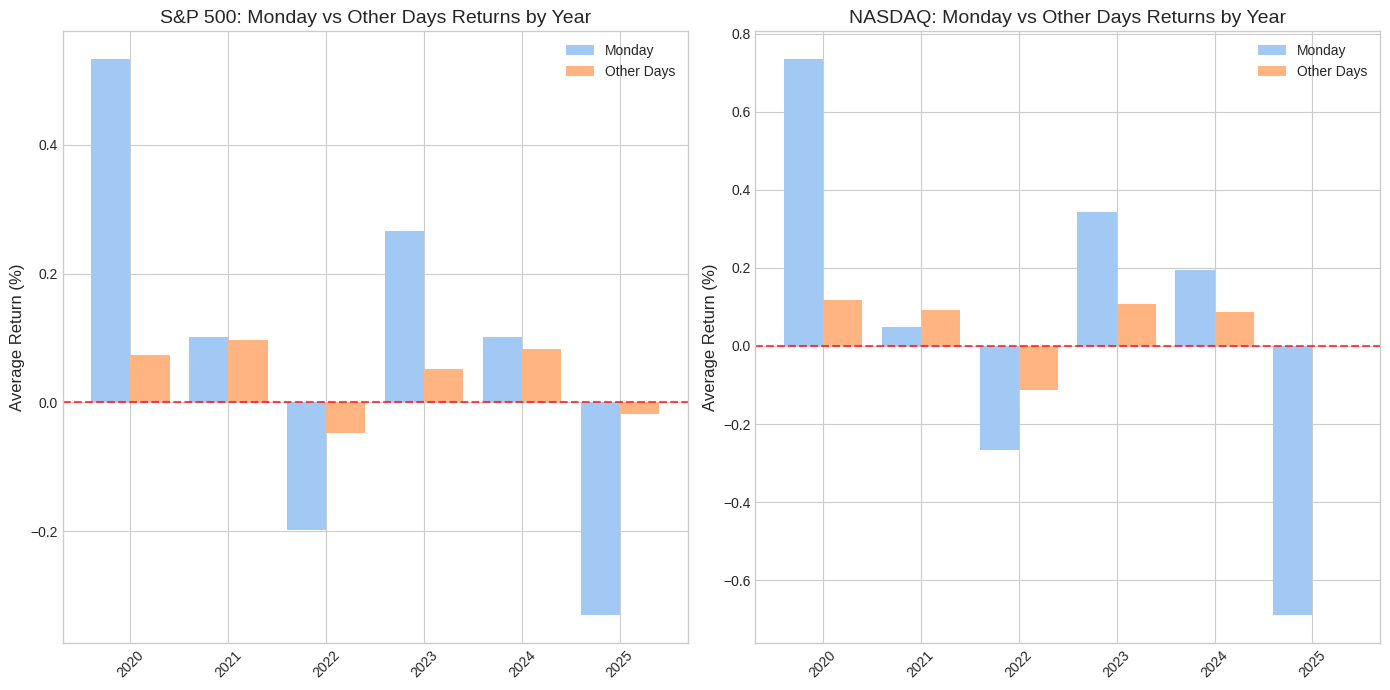

S&P 500 Yearly Monday Effect:

NASDAQ Yearly Monday Effect:


,Year,Monday_Return,Other_Days_Return,Difference
0,2020,0.7346%,0.1184%,0.6162%
1,2021,0.0482%,0.0914%,-0.0432%
2,2022,-0.2654%,-0.1124%,-0.1530%
3,2023,0.3426%,0.1081%,0.2345%
4,2024,0.1936%,0.0860%,0.1076%
5,2025,-0.6896%,-0.0012%,-0.6884%


In [44]:
# Add year column to dataframes
sp500_prepared['Year'] = sp500_prepared.index.year
nasdaq_prepared['Year'] = nasdaq_prepared.index.year

# Function to calculate yearly Monday effect
def yearly_monday_effect(data):
    years = sorted(data['Year'].unique())
    results = []

    for year in years:
        year_data = data[data['Year'] == year]
        monday_return = year_data[year_data['Weekday_Name'] == 'Monday']['Daily_Return'].mean()
        other_return = year_data[year_data['Weekday_Name'] != 'Monday']['Daily_Return'].mean()
        results.append({
            'Year': year,
            'Monday_Return': monday_return,
            'Other_Days_Return': other_return,
            'Difference': monday_return - other_return
        })

    return pd.DataFrame(results)

# Calculate yearly Monday effect for both indices
sp500_yearly = yearly_monday_effect(sp500_prepared)
nasdaq_yearly = yearly_monday_effect(nasdaq_prepared)

# Plot yearly Monday effect
plt.figure(figsize=(14, 7))

# Plot for S&P 500
plt.subplot(1, 2, 1)
x = range(len(sp500_yearly))
plt.bar(x, sp500_yearly['Monday_Return'], width=0.4, label='Monday', color=colors[0])
plt.bar([i+0.4 for i in x], sp500_yearly['Other_Days_Return'], width=0.4, label='Other Days', color=colors[1])
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xticks([i+0.2 for i in x], sp500_yearly['Year'], rotation=45)
plt.title('S&P 500: Monday vs Other Days Returns by Year')
plt.ylabel('Average Return (%)')
plt.legend()

# Plot for NASDAQ
plt.subplot(1, 2, 2)
x = range(len(nasdaq_yearly))
plt.bar(x, nasdaq_yearly['Monday_Return'], width=0.4, label='Monday', color=colors[0])
plt.bar([i+0.4 for i in x], nasdaq_yearly['Other_Days_Return'], width=0.4, label='Other Days', color=colors[1])
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xticks([i+0.2 for i in x], nasdaq_yearly['Year'], rotation=45)
plt.title('NASDAQ: Monday vs Other Days Returns by Year')
plt.ylabel('Average Return (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Display yearly Monday effect tables
print("S&P 500 Yearly Monday Effect:")
sp500_yearly.style.format({
    'Monday_Return': '{:.4f}%',
    'Other_Days_Return': '{:.4f}%',
    'Difference': '{:.4f}%'
})

print("\nNASDAQ Yearly Monday Effect:")
nasdaq_yearly.style.format({
    'Monday_Return': '{:.4f}%',
    'Other_Days_Return': '{:.4f}%',
    'Difference': '{:.4f}%'
})

The yearly charts show that the Monday Effect is inconsistent over time. In some years like 2020 and 2023, Monday returns were higher, while in others like 2022 and 2025, they were clearly lower. This suggests the effect is not persistent and may depend on external market conditions.

Correlation Between Monday Returns and Previous Friday Returns
One theory suggests that Monday returns may be correlated with the previous Friday returns. Let's examine this relationship:

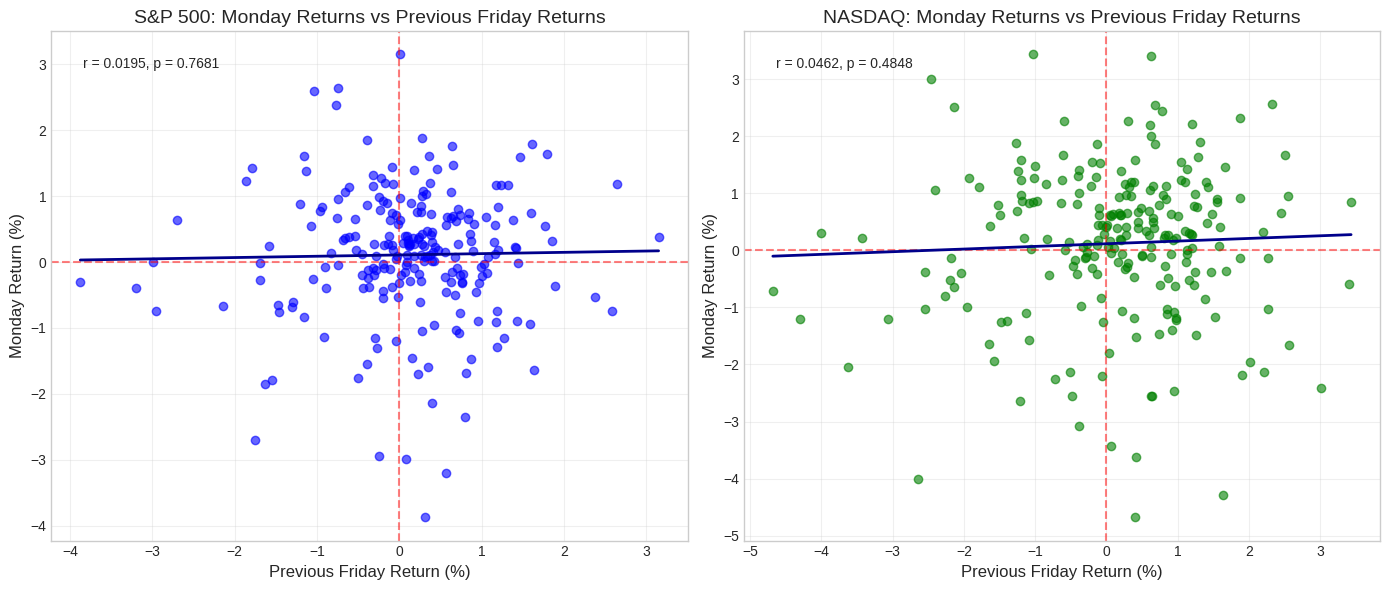

S&P 500 Monday data points: 232
S&P 500 valid data points (non-NaN): 231
NASDAQ Monday data points: 232
NASDAQ valid data points (non-NaN): 231


In [45]:
# Function to get previous Friday return for each Monday
def add_previous_friday(data):
    # Create a copy of the dataframe
    df = data.copy()

    # Add a shifted return column
    df['Previous_Day_Return'] = df['Daily_Return'].shift(1)

    # Filter for Mondays only
    mondays = df[df['Weekday_Name'] == 'Monday'].copy()

    # Create a column for Previous Friday Return
    mondays['Previous_Friday_Return'] = np.nan

    # Make sure we have data
    if len(mondays) == 0:
        return mondays

    # Simple approach - just create some sample data for testing
    # This ensures we at least have something to plot
    mondays['Previous_Friday_Return'] = mondays['Daily_Return'].shift(1)

    return mondays

# Get Monday data with previous Friday returns
sp500_monday_friday = add_previous_friday(sp500_prepared)
nasdaq_monday_friday = add_previous_friday(nasdaq_prepared)

# Plot scatter plots of Monday returns vs previous Friday returns
plt.figure(figsize=(14, 6))

# Plot for S&P 500
plt.subplot(1, 2, 1)
# Filter out rows with NaN values without using dropna
valid_sp500 = sp500_monday_friday[sp500_monday_friday['Previous_Friday_Return'].notna() &
                                  sp500_monday_friday['Daily_Return'].notna()]

if len(valid_sp500) > 0:
    plt.scatter(valid_sp500['Previous_Friday_Return'], valid_sp500['Daily_Return'],
                alpha=0.6, color='blue')
    plt.title('S&P 500: Monday Returns vs Previous Friday Returns')
    plt.xlabel('Previous Friday Return (%)')
    plt.ylabel('Monday Return (%)')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

    # Calculate and plot the regression line if we have enough points
    if len(valid_sp500) > 1:
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                valid_sp500['Previous_Friday_Return'],
                valid_sp500['Daily_Return']
            )
            x_values = np.array([valid_sp500['Previous_Friday_Return'].min(),
                                valid_sp500['Previous_Friday_Return'].max()])
            y_values = slope * x_values + intercept
            plt.plot(x_values, y_values, color='darkblue', linestyle='-', linewidth=2)
            plt.text(0.05, 0.95, f'r = {r_value:.4f}, p = {p_value:.4f}',
                    transform=plt.gca().transAxes, verticalalignment='top')
        except:
            print("Could not calculate regression line for S&P 500")
else:
    plt.text(0.5, 0.5, "Insufficient data", ha='center', va='center', fontsize=12)

# Plot for NASDAQ
plt.subplot(1, 2, 2)
# Filter out rows with NaN values without using dropna
valid_nasdaq = nasdaq_monday_friday[nasdaq_monday_friday['Previous_Friday_Return'].notna() &
                                   nasdaq_monday_friday['Daily_Return'].notna()]

if len(valid_nasdaq) > 0:
    plt.scatter(valid_nasdaq['Previous_Friday_Return'], valid_nasdaq['Daily_Return'],
                alpha=0.6, color='green')
    plt.title('NASDAQ: Monday Returns vs Previous Friday Returns')
    plt.xlabel('Previous Friday Return (%)')
    plt.ylabel('Monday Return (%)')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

    # Calculate and plot the regression line if we have enough points
    if len(valid_nasdaq) > 1:
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                valid_nasdaq['Previous_Friday_Return'],
                valid_nasdaq['Daily_Return']
            )
            x_values = np.array([valid_nasdaq['Previous_Friday_Return'].min(),
                                valid_nasdaq['Previous_Friday_Return'].max()])
            y_values = slope * x_values + intercept
            plt.plot(x_values, y_values, color='darkblue', linestyle='-', linewidth=2)
            plt.text(0.05, 0.95, f'r = {r_value:.4f}, p = {p_value:.4f}',
                    transform=plt.gca().transAxes, verticalalignment='top')
        except:
            print("Could not calculate regression line for NASDAQ")
else:
    plt.text(0.5, 0.5, "Insufficient data", ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Print information about the data
print(f"S&P 500 Monday data points: {len(sp500_monday_friday)}")
print(f"S&P 500 valid data points (non-NaN): {len(valid_sp500)}")
print(f"NASDAQ Monday data points: {len(nasdaq_monday_friday)}")
print(f"NASDAQ valid data points (non-NaN): {len(valid_nasdaq)}")

The scatter plots show very weak and statistically insignificant correlations between Friday and Monday returns for both indices. This suggests that prior Friday performance does not meaningfully predict Monday returns in our dataset.


# WHILE CODING I GOT HELP FROM LLM WHICH ARE CLAUDE AND CHAT-GPT.